## Initialization and Loading Data

In [1]:
##Importing Packages and  Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')


In [3]:
#Understanding the Data 
print(df.shape)

(9240, 37)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
##to understand the numeric value in the dataset 
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleansing 

In [7]:
## Finding out NULL values 
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
##High Null Values for 
##Tags,Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score 
## Dropping fields with NULL % abve 40%

DF = df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis= 1)

In [9]:
DF.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [10]:
## Working out NULL values 
DF.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
## filling up rest of the NULL records as deleting rows may lead to data loss 
## Cannot use mode to update categorical data as it might change its meaning 

DF['Country'] = DF['Country'].fillna('NA') 
DF['Specialization'] = DF['Specialization'].fillna('NA') 
DF['How did you hear about X Education'] = DF['How did you hear about X Education'].fillna('NA') 
DF['What is your current occupation'] = DF['What is your current occupation'].fillna('NA') 
DF['What matters most to you in choosing a course'] = DF['What matters most to you in choosing a course'].fillna('NA') 
DF['Tags'] = DF['Tags'].fillna('NA') 
DF['Lead Profile'] = DF['Lead Profile'].fillna('NA') 
DF['City'] = DF['City'].fillna('NA') 

In [12]:
## Working out NULL values 
DF.isnull().mean()*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [13]:
## Undesrstanding each field before imputing 
print(DF['Last Activity'].value_counts(normalize = True))

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64


In [14]:
## Last Activity to be filled as NA 
DF['Last Activity'] = DF['Last Activity'].fillna('NA') 

In [15]:
print(DF['Page Views Per Visit'].value_counts(normalize = True))

0.00    0.240470
2.00    0.197188
3.00    0.131385
4.00    0.098429
1.00    0.071515
          ...   
1.27    0.000110
8.21    0.000110
2.14    0.000110
2.63    0.000110
2.45    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64


In [16]:
## This is categorical value, assuming the missing values will be google as mostly people refer google for any info
print(DF['Lead Source'].mode())
DF['Lead Source'] = DF['Lead Source'].fillna('Google')

0    Google
dtype: object


In [17]:
## Assuming Total visit is 0
print(DF['TotalVisits'].mode())
DF['TotalVisits'] = DF['TotalVisits'].fillna(0)

0    0.0
dtype: float64


In [18]:
## Same goes for Page views per visit 0
print(DF['Page Views Per Visit'].mode())
DF['Page Views Per Visit'] = DF['Page Views Per Visit'].fillna(0)

0    0.0
dtype: float64


In [19]:
## Understanding all Categorical values 
for column in DF:
    print(DF[column].astype('category').value_counts(normalize = True))
    print('###########################################################################')

fffb0e5e-9f92-4017-9f42-781a69da4154    0.000108
56453aec-3f7b-4f30-870c-8f966d393100    0.000108
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.000108
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.000108
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.000108
                                          ...   
aa4180a5-84f1-4e67-8d90-0c8403070a59    0.000108
aa405742-17ac-4c65-b19e-ab91c241cc53    0.000108
aa30ebb2-8476-41ce-9258-37cc025110d3    0.000108
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.000108
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
###########################################################################
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
###########################################################################
Land

Name: Get updates on DM Content, dtype: float64
###########################################################################
Select                         0.448701
NA                             0.293182
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead Profile, dtype: float64
###########################################################################
Mumbai                         0.348701
Select                         0.243398
NA                             0.153680
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64
###########################################################################
No    1.0
Name: I agree to pay the amount through cheque, dtyp

In [20]:
## Removing prospect id and Lead Number as it is a key field, and does not provide any information for analysis
DF = DF.drop('Prospect ID',1)
DF = DF.drop('Lead Number',1)

In [21]:
DF.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      18
Country                                            39
Specialization                                     20
How did you hear about X Education                 11
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

## EDA: Univariate and Bi Variate analysis

In [22]:
## EDA, Creating a new DATA Frame for Easy Data Analysis
DF_NEW = DF

In [23]:
DF_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

### EDA on Categorical Data

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object


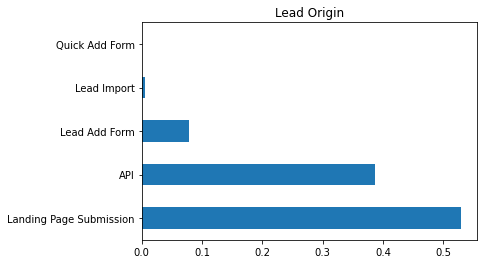

count       9240
unique        21
top       Google
freq        2904
Name: Lead Source, dtype: object


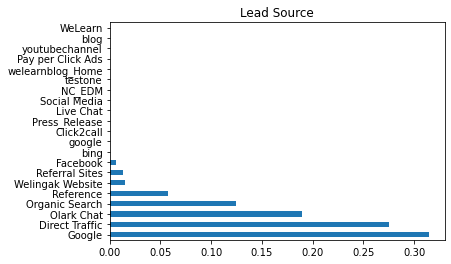

count     9240
unique       2
top         No
freq      8506
Name: Do Not Email, dtype: object


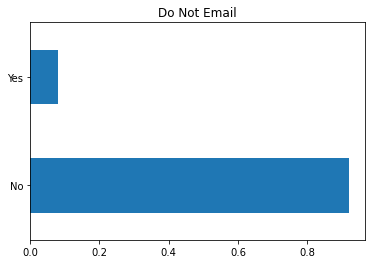

count     9240
unique       2
top         No
freq      9238
Name: Do Not Call, dtype: object


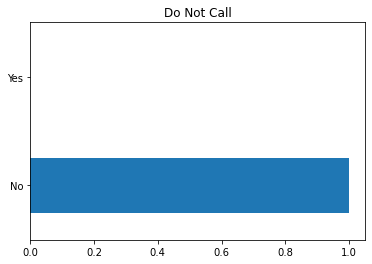

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64


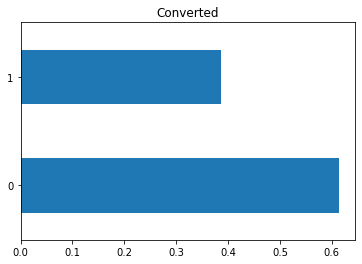

count             9240
unique              18
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


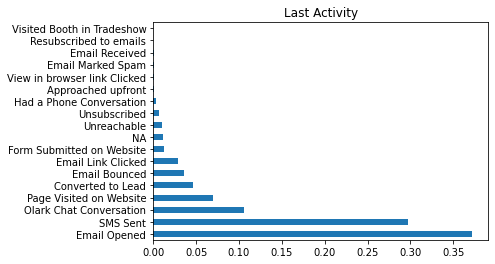

count      9240
unique       39
top       India
freq       6492
Name: Country, dtype: object


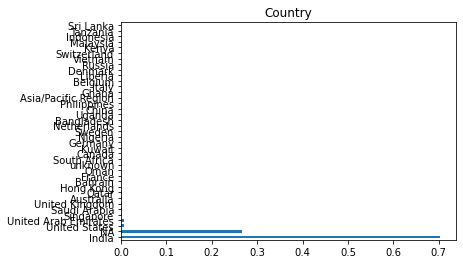

count       9240
unique        20
top       Select
freq        1942
Name: Specialization, dtype: object


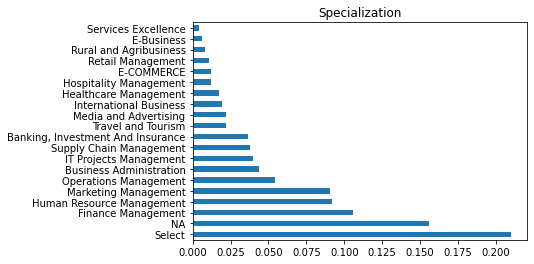

count       9240
unique        11
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object


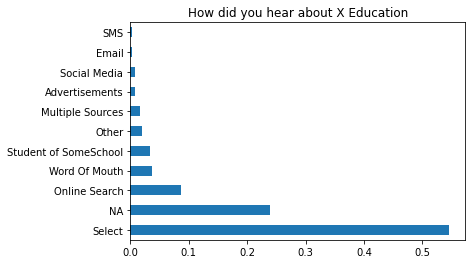

count           9240
unique             7
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


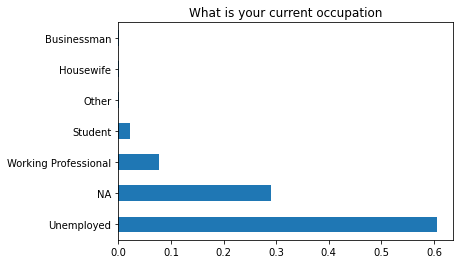

count                        9240
unique                          4
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


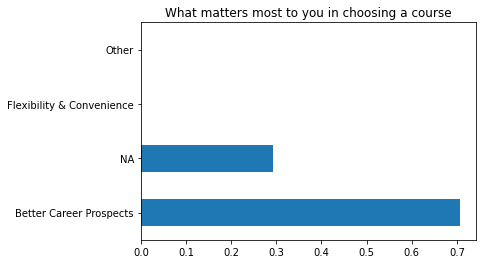

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object


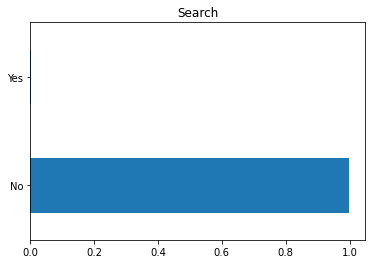

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object


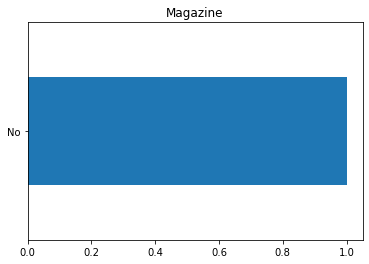

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object


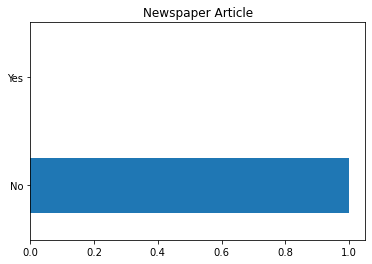

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object


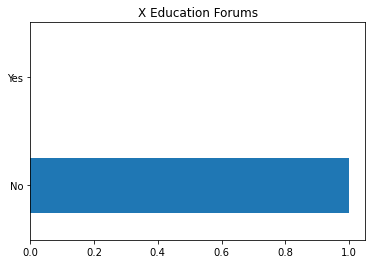

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object


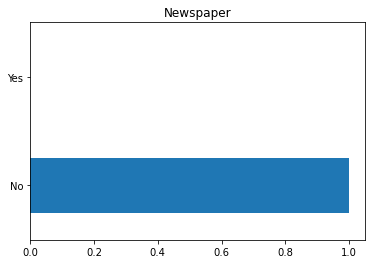

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object


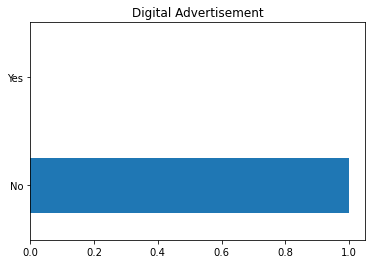

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object


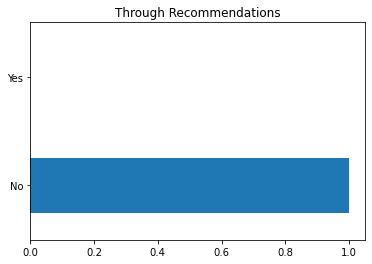

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object


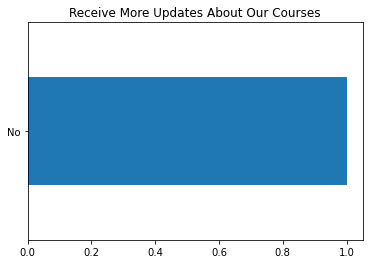

count     9240
unique      27
top         NA
freq      3353
Name: Tags, dtype: object


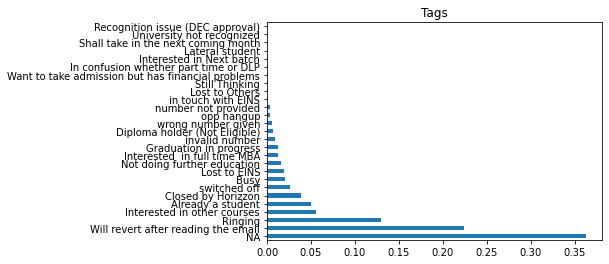

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object


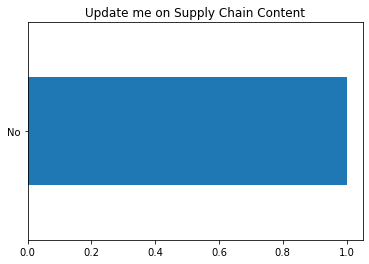

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object


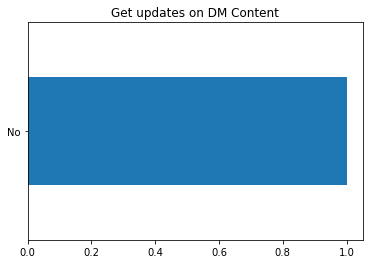

count       9240
unique         7
top       Select
freq        4146
Name: Lead Profile, dtype: object


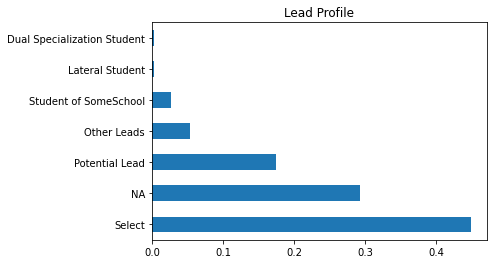

count       9240
unique         8
top       Mumbai
freq        3222
Name: City, dtype: object


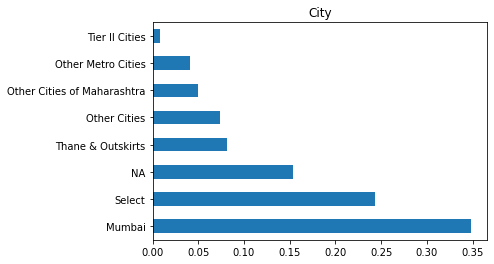

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object


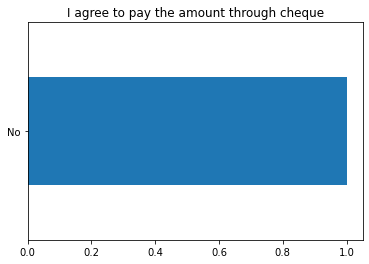

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object


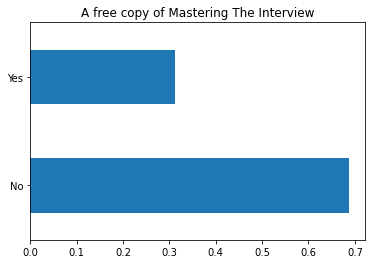

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object


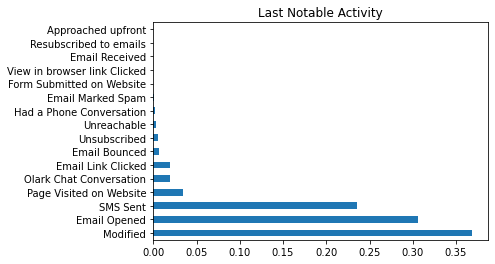

In [24]:
## Bar Plot for all categorical attributes

for col in ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']:
    print(DF_NEW[col].describe())
    DF_NEW[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
    plt.show()

### Observation

After validating Bar plots for all the categorical values: 
1. Lead Source : google and Google can be merged 
2. Country can be segregated as India, NA and US and Others 
3. Field with one Unique value can be dropped as no one is interested for these offers and this migh make the model skewed 

In [25]:
##Dropping Unique valued fields
DF_NEW1 = DF_NEW.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'],axis= 1)

In [26]:
## Grouping COuntry into 3 groups

DF_NEW2= DF_NEW1
DF_NEW2['Country'] = DF_NEW2['Country'].map(lambda x:'India' if x=='India' else ('NA' if x=='NA' else 'Others') )


In [27]:
DF_NEW2['Country'].value_counts(normalize= True)

India     0.702597
NA        0.266342
Others    0.031061
Name: Country, dtype: float64

In [28]:
## Merging google and Google
DF_NEW2['Lead Source'] =DF_NEW2['Lead Source'].replace('google', 'Google')

In [29]:
# Merging values for Lead SOurce

for col in ['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM']:
    DF_NEW2['Lead Source'] =DF_NEW2['Lead Source'].replace(col, 'Other')


In [30]:
DF_NEW2["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [31]:
## Merging values for TAG

for i in ['Graduation in progress','invalid number','Shall take in the next coming month','Still Thinking','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still','Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming','month','University not recognized','Recognition issue (DEC approval)']:
    DF_NEW2['Tags'] =DF_NEW2['Tags'].replace(i, 'Other')

In [32]:
DF_NEW2["Tags"].value_counts()

NA                                     3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Other                                   413
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Name: Tags, dtype: int64

In [33]:
## Merging values for Last Notable Activity

for i in ['Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website']:
    DF_NEW2['Last Notable Activity'] =DF_NEW2['Last Notable Activity'].replace(i, 'Other')

In [34]:
for i in ['Email Link Clicked','Email Opened','Email Bounced','Email Marked Spam','Email Received']:
    DF_NEW2['Last Notable Activity'] =DF_NEW2['Last Notable Activity'].replace(i, 'Email')

In [35]:
DF_NEW2['Last Notable Activity'].value_counts()

Modified                    3407
Email                       3063
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          4
Name: Last Notable Activity, dtype: int64

In [36]:
## Confirmation on NULL
DF_NEW2.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### First leg data cleansing completed 

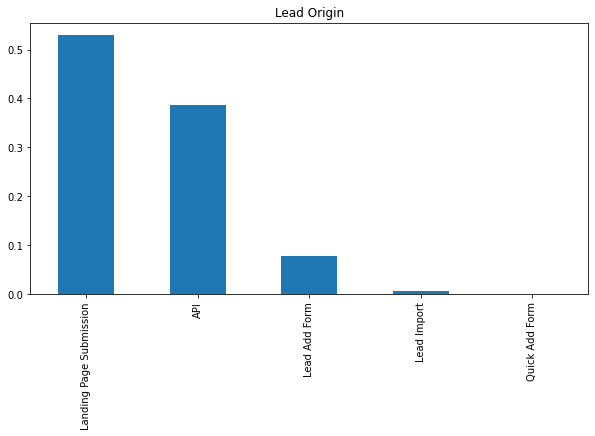

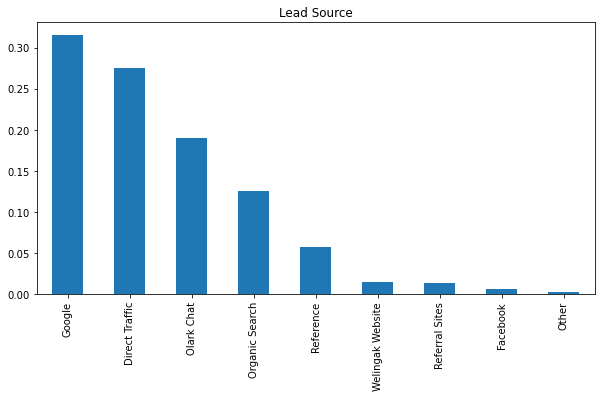

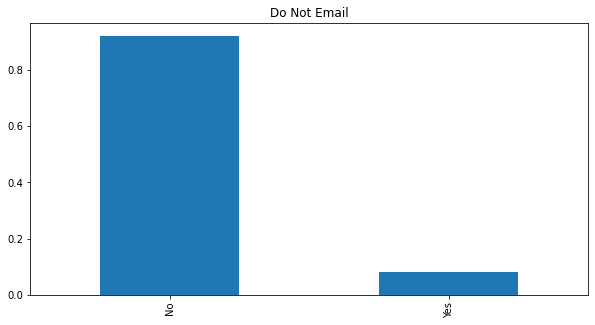

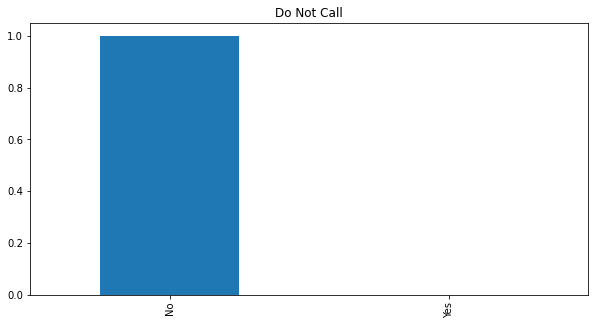

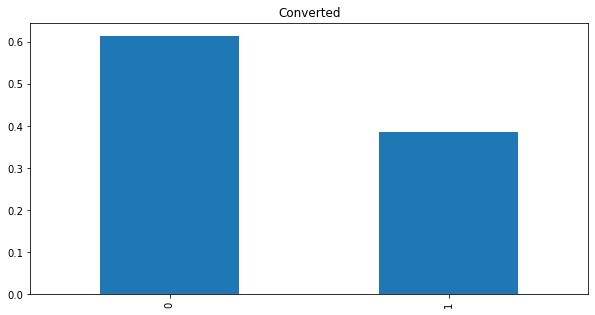

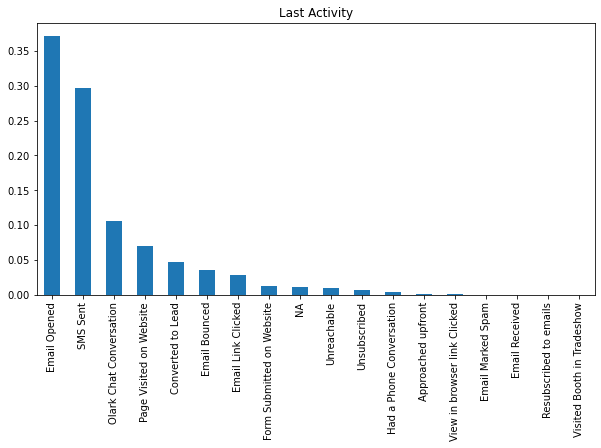

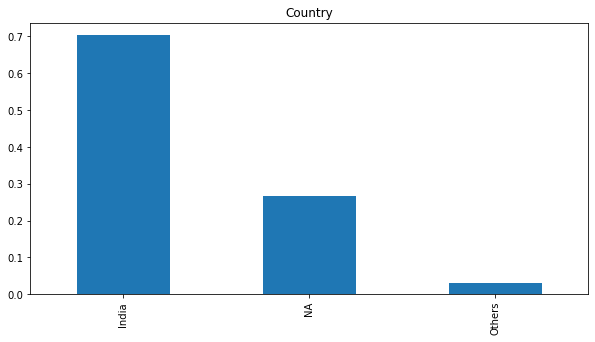

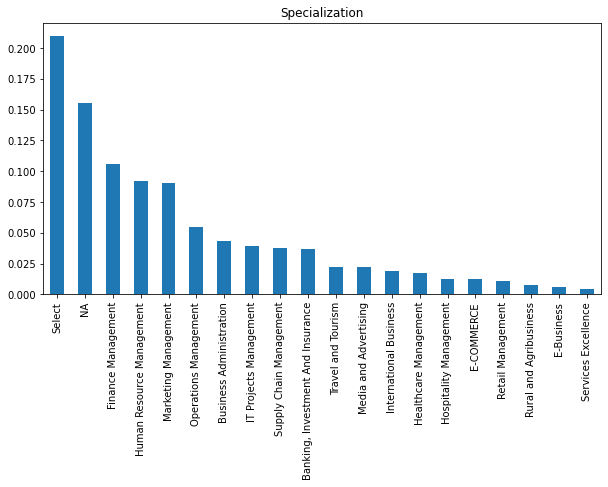

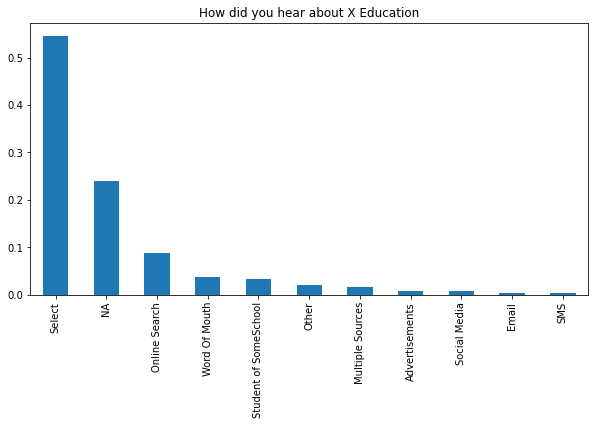

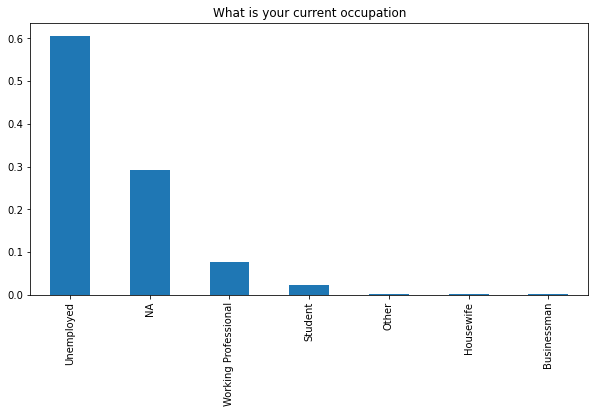

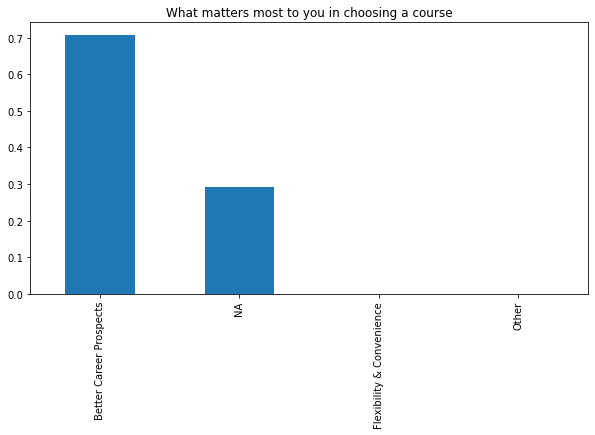

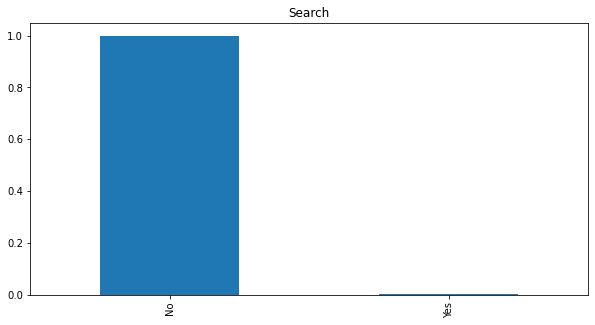

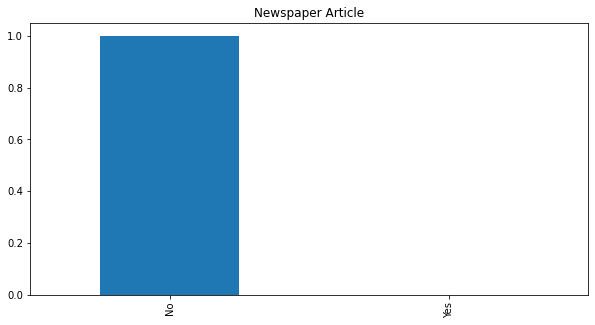

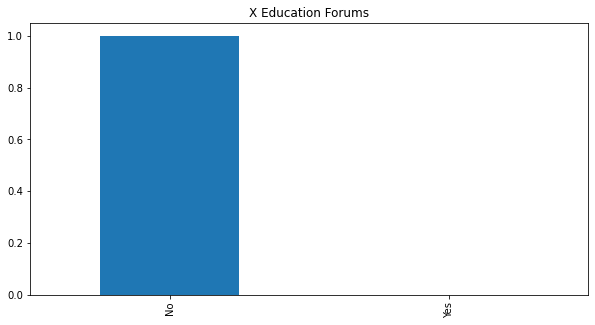

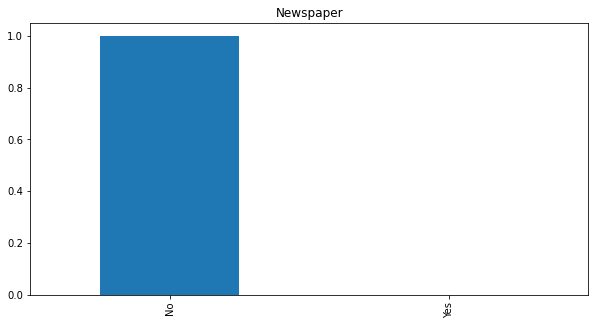

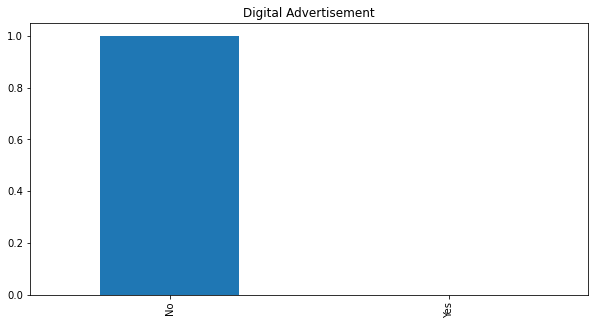

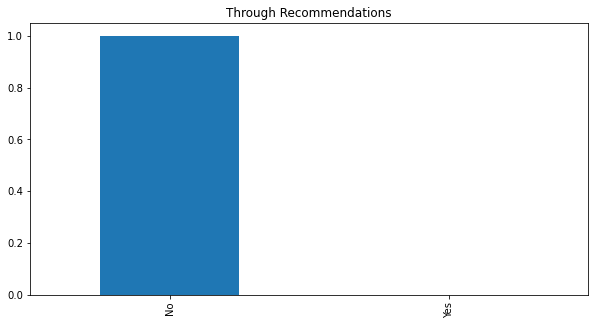

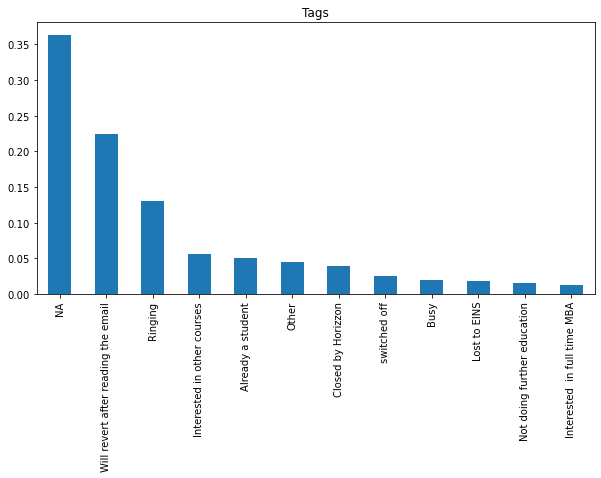

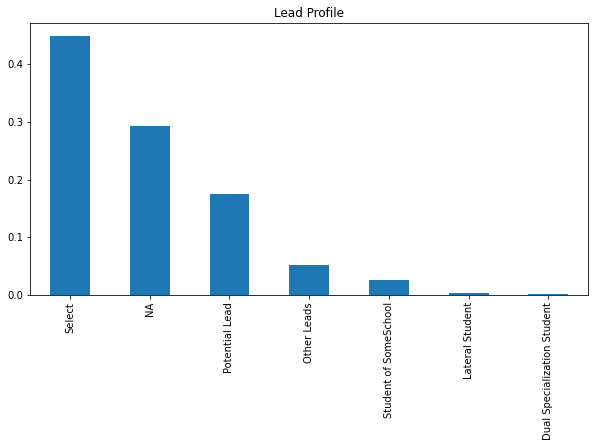

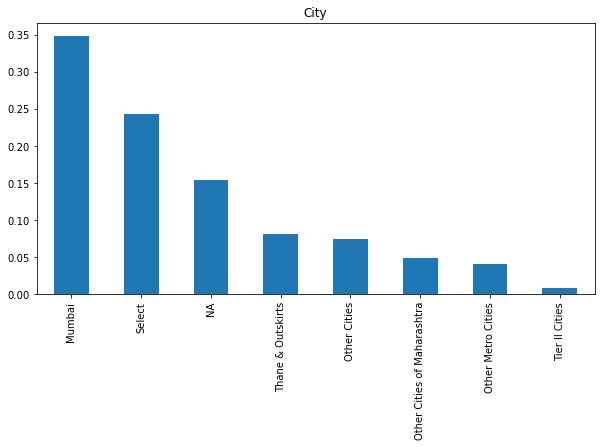

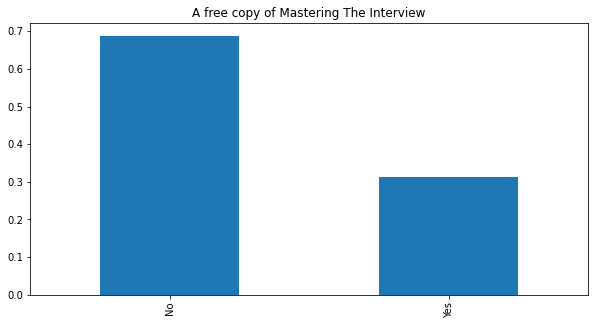

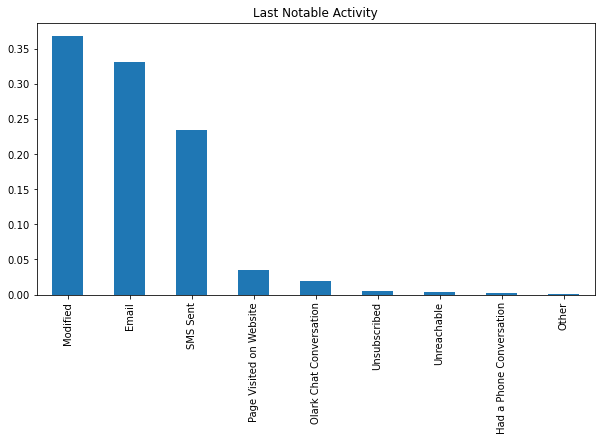

In [37]:
## Univariate Data ANalysis 


for col in ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity']:
    plt.figure(figsize = (10,5))
    DF_NEW2[col].value_counts(normalize=True).plot.bar()
    plt.title(col)
    plt.show()


### EDA on Numerical Data

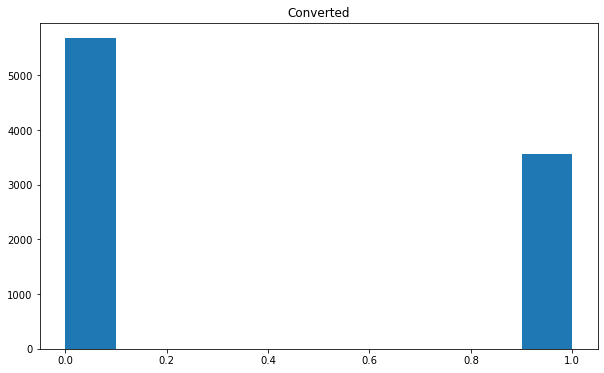

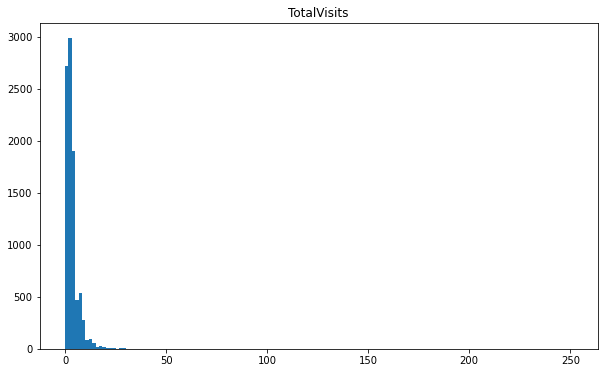

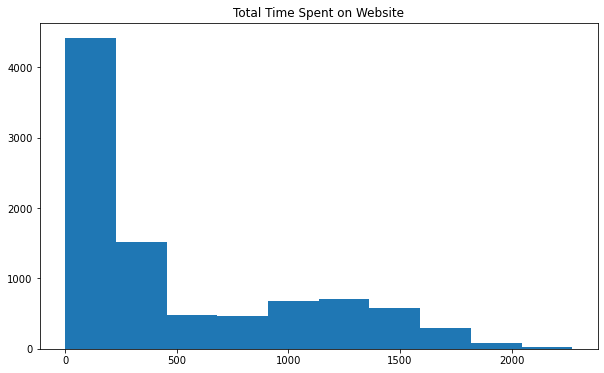

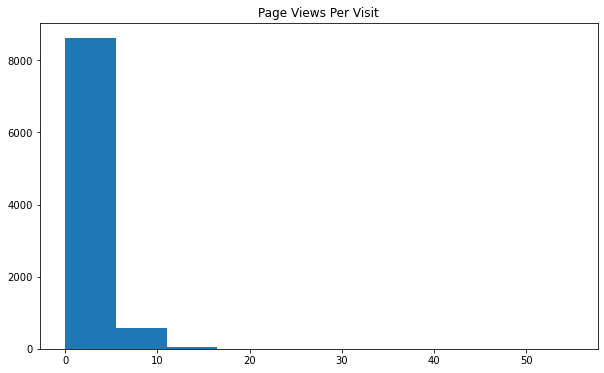

In [38]:
## Numeric value analysis

plt.figure(figsize=(10,6))
plt.hist(DF_NEW2['Converted'], bins = 10)
plt.title('Converted')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(DF_NEW2['TotalVisits'], bins = 150)
plt.title('TotalVisits')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(DF_NEW2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(DF_NEW2['Page Views Per Visit'], bins = 10)
plt.title('Page Views Per Visit')
plt.show()

### Bivariate Analysis on "Converted"

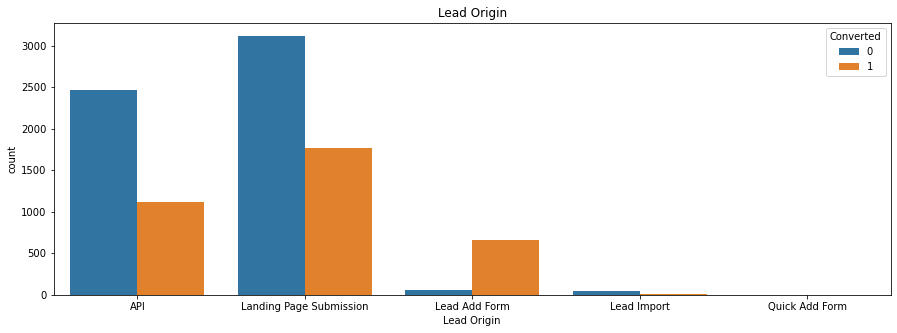

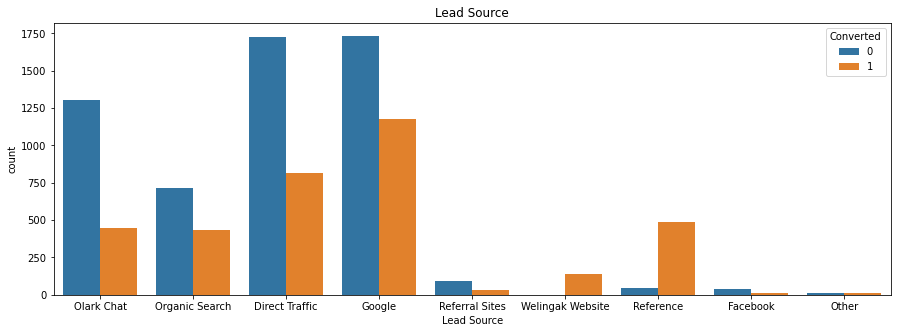

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(x='Lead Origin', hue='Converted', data= DF_NEW2)
plt.title('Lead Origin')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='Lead Source', hue='Converted', data= DF_NEW2)
plt.title('Lead Source')
plt.show()

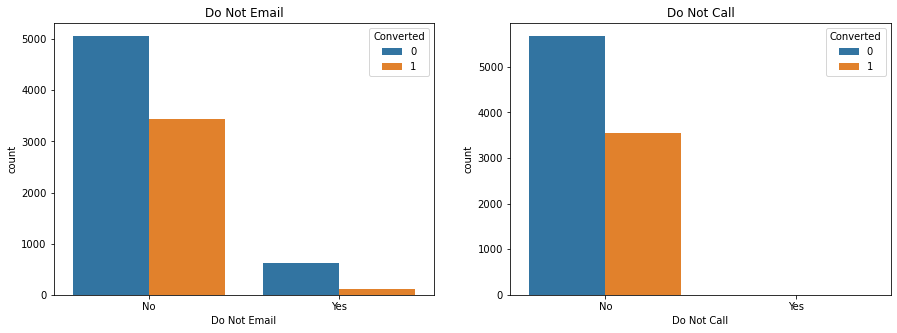

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= DF_NEW2)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= DF_NEW2)
plt.title('Do Not Call')
plt.show()

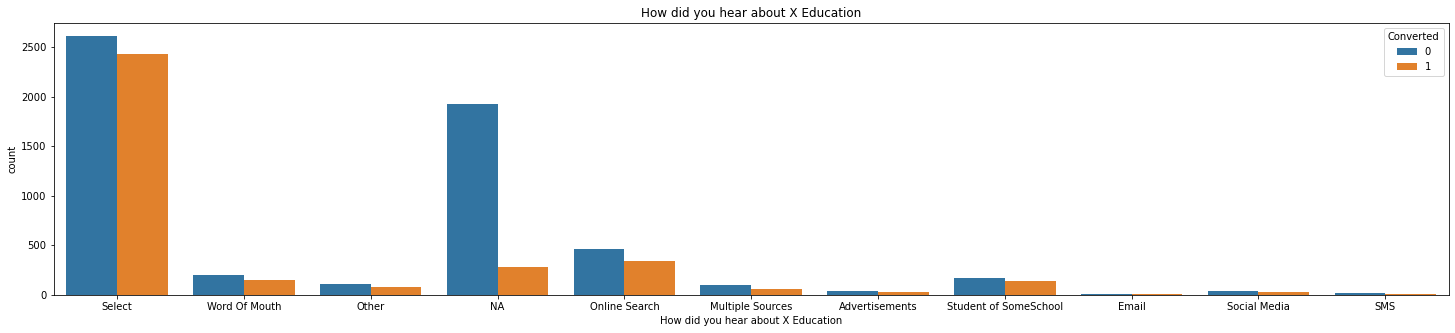

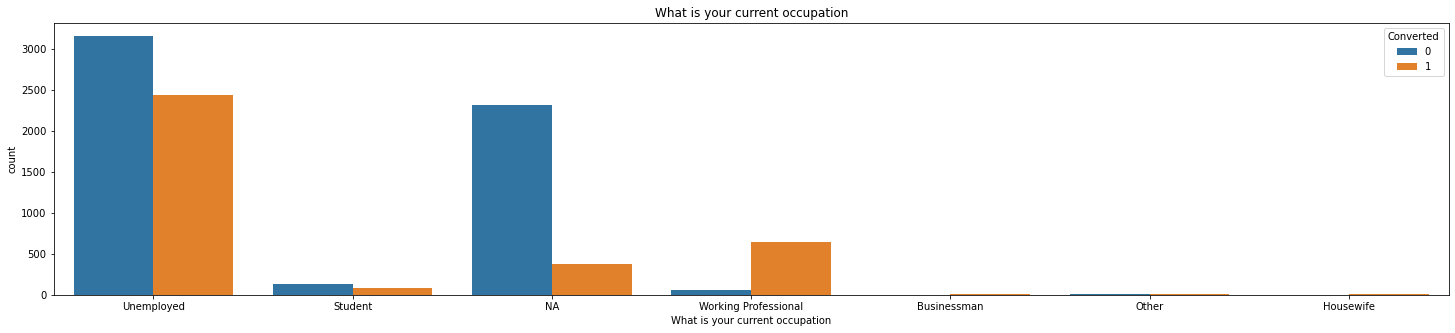

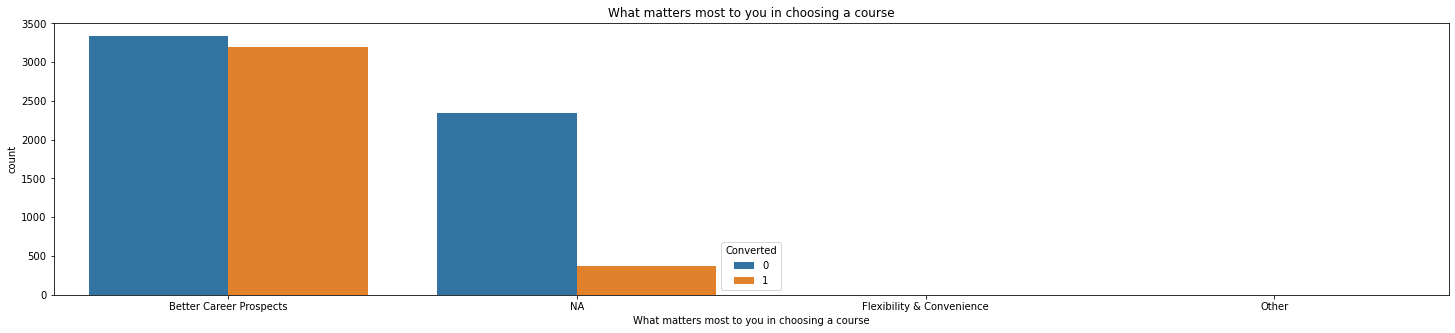

In [41]:
col= ['How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course']

for i in col:
    plt.figure(figsize = (25,5))
    sns.countplot(x=i, hue='Converted', data= DF_NEW2)
    plt.title(i)
    plt.show()


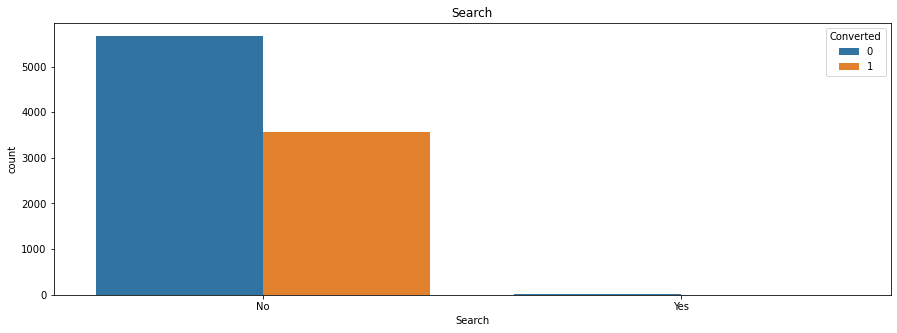

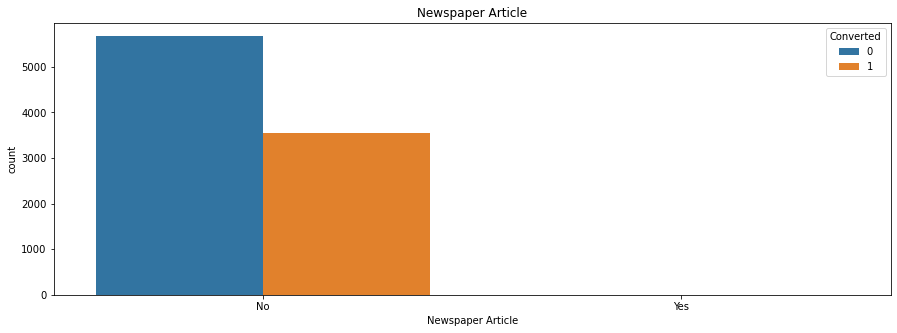

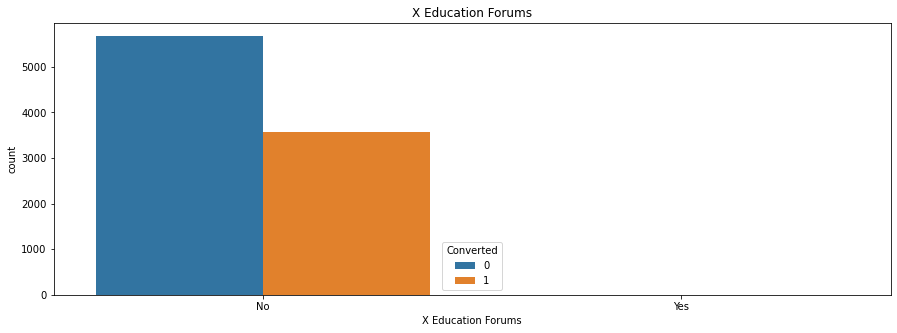

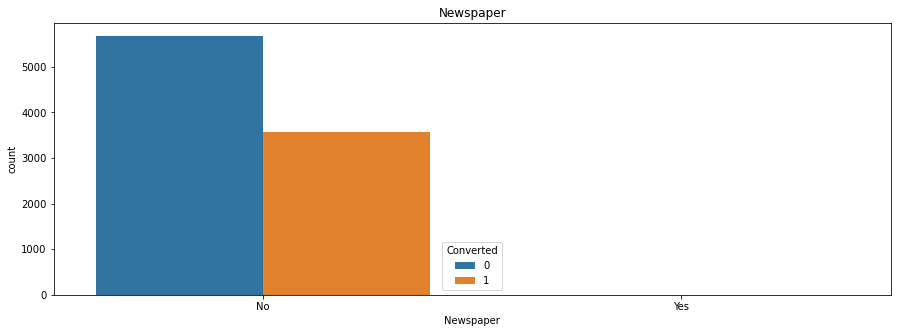

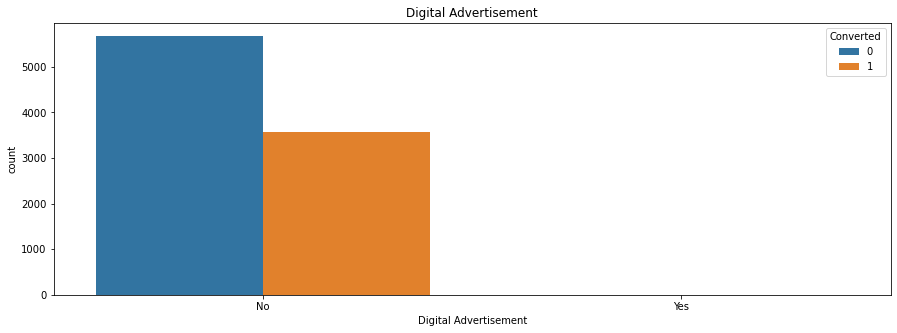

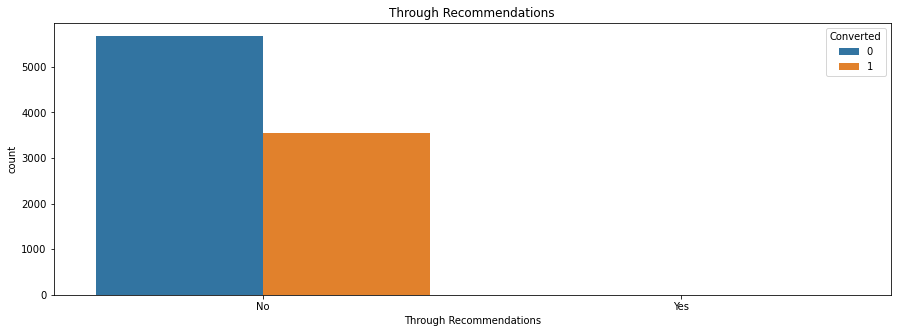

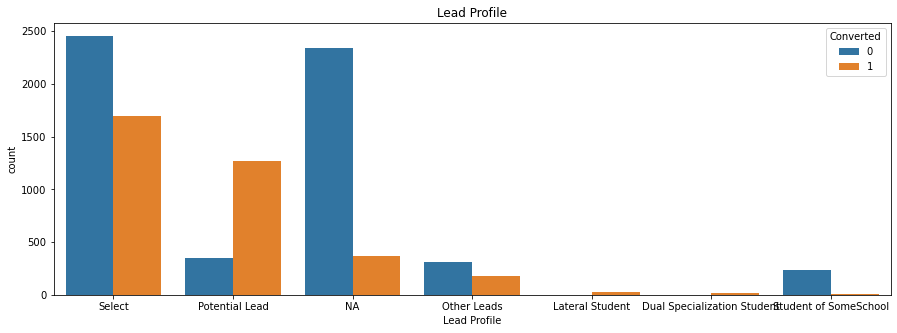

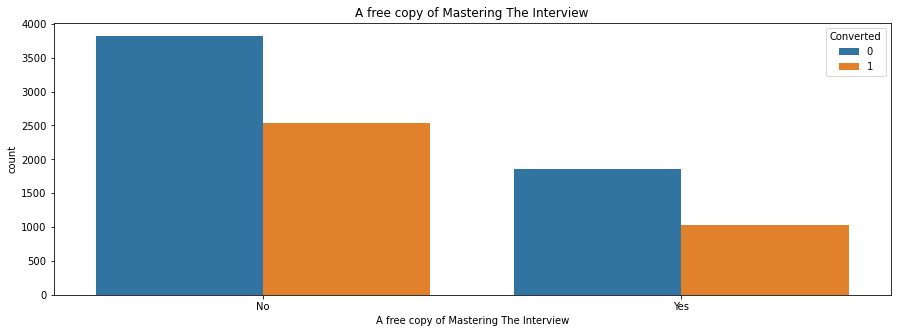

In [42]:
col= ['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Lead Profile','A free copy of Mastering The Interview']

for i in col:
    plt.figure(figsize = (15,5))
    sns.countplot(x=i, hue='Converted', data= DF_NEW2)
    plt.title(i)
    plt.show()

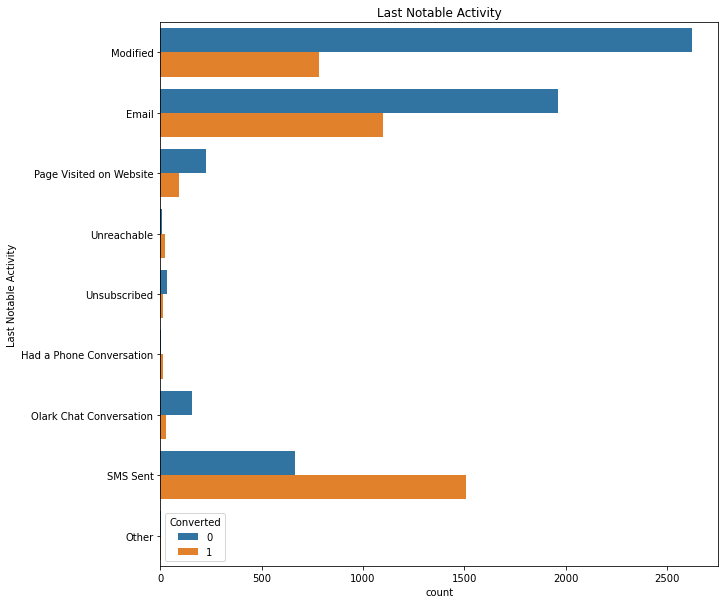

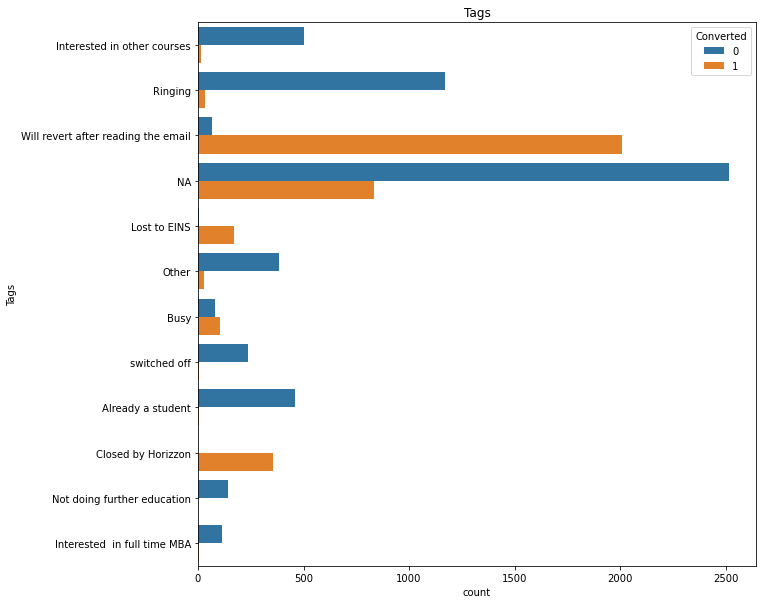

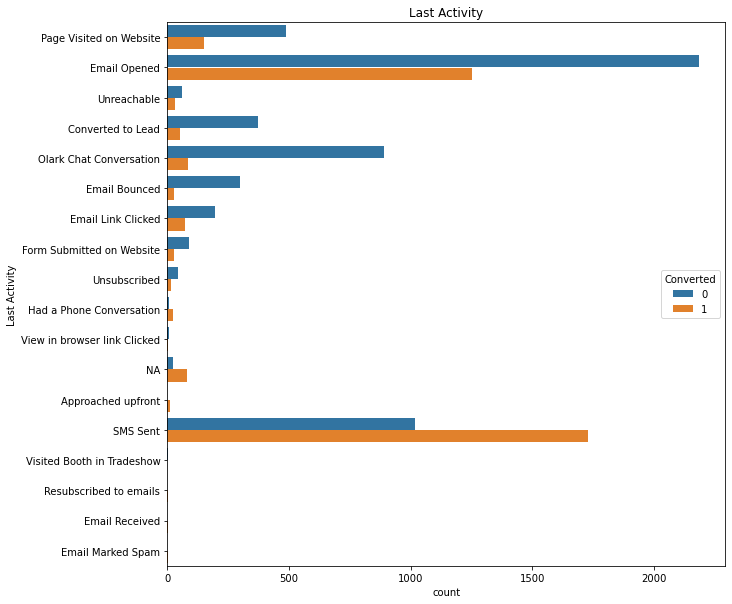

In [43]:
col= ['Last Notable Activity','Tags','Last Activity']

for i in col:
    plt.figure(figsize = (10,10))
    sns.countplot(y=i, hue='Converted', data= DF_NEW2)
    plt.title(i)
    plt.show()

In [44]:
DF_NEW3 = DF_NEW2

In [45]:
DF_NEW3.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Treating Outliers

In [46]:
## Deleteing Outliers

print(DF_NEW3['TotalVisits'].describe())
#DF_NEW3['TotalVisits']<lower_lim
print('20% Quanta', DF_NEW3['TotalVisits'].quantile(0.20))
print('80% Quanta', DF_NEW3['TotalVisits'].quantile(0.80))

IQR= DF_NEW3['TotalVisits'].quantile(0.80)- DF_NEW3['TotalVisits'].quantile(0.20)

Lower_lim = (DF_NEW3['TotalVisits'].quantile(0.20) - 1.5)*IQR
upper_lim = (DF_NEW3['TotalVisits'].quantile(0.80) + 1.5)*IQR

print('IQR',IQR)
print('Lower',Lower_lim)
print('upper',upper_lim)

DF_NEW3['TotalVisits']=DF_NEW3['TotalVisits'][~((DF_NEW3['TotalVisits']<Lower_lim)|(DF_NEW3['TotalVisits']>upper_lim))]

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
20% Quanta 0.0
80% Quanta 5.0
IQR 5.0
Lower -7.5
upper 32.5


In [47]:
print(DF_NEW3['Total Time Spent on Website'].describe())
#DF_NEW3['TotalVisits']<lower_lim
print('20% Quanta', DF_NEW3['Total Time Spent on Website'].quantile(0.20))
print('80% Quanta', DF_NEW3['Total Time Spent on Website'].quantile(0.80))

IQR= DF_NEW3['Total Time Spent on Website'].quantile(0.80)- DF_NEW3['Total Time Spent on Website'].quantile(0.20)

Lower_lim = (DF_NEW3['Total Time Spent on Website'].quantile(0.20) - 1.5)*IQR
upper_lim = (DF_NEW3['Total Time Spent on Website'].quantile(0.80) + 1.5)*IQR

print('IQR',IQR)
print('Lower',Lower_lim)
print('upper',upper_lim)

DF_NEW3['Total Time Spent on Website']=DF_NEW3['Total Time Spent on Website'][~((DF_NEW3['Total Time Spent on Website']<Lower_lim)|(DF_NEW3['Total Time Spent on Website']>upper_lim))]

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
20% Quanta 0.0
80% Quanta 1087.2000000000007
IQR 1087.2000000000007
Lower -1630.800000000001
upper 1183634.6400000015


In [48]:
print(DF_NEW3['Page Views Per Visit'].describe())
#DF_NEW3['TotalVisits']<lower_lim
print('20% Quanta', DF_NEW3['Page Views Per Visit'].quantile(0.20))
print('80% Quanta', DF_NEW3['Page Views Per Visit'].quantile(0.80))

IQR= DF_NEW3['Page Views Per Visit'].quantile(0.80)- DF_NEW3['Page Views Per Visit'].quantile(0.20)

Lower_lim = (DF_NEW3['Page Views Per Visit'].quantile(0.20) - 1.5)*IQR
upper_lim = (DF_NEW3['Page Views Per Visit'].quantile(0.80) + 1.5)*IQR

print('IQR',IQR)
print('Lower',Lower_lim)
print('upper',upper_lim)

DF_NEW3['Page Views Per Visit']=DF_NEW3['Page Views Per Visit'][~((DF_NEW3['Page Views Per Visit']<Lower_lim)|(DF_NEW3['Page Views Per Visit']>upper_lim))]

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
20% Quanta 0.0
80% Quanta 4.0
IQR 4.0
Lower -6.0
upper 22.0


count    9231.000000
mean        3.309067
std         3.431472
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        32.000000
Name: TotalVisits, dtype: float64


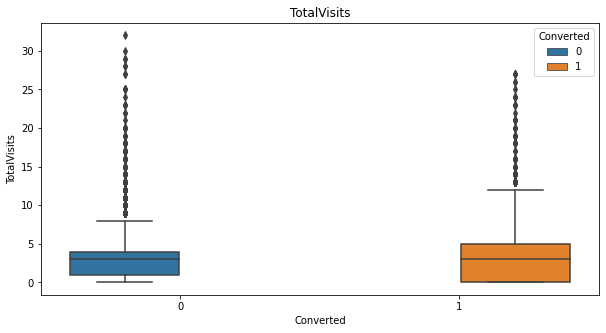

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


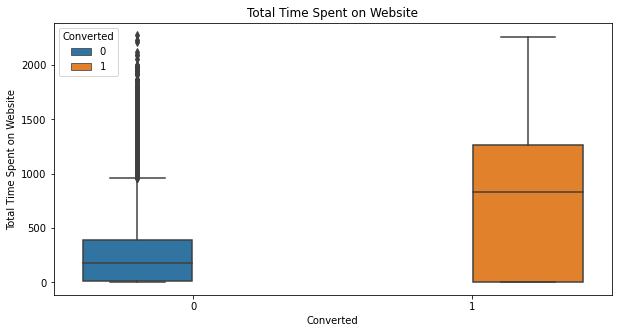

count    9238.000000
mean        2.319739
std         2.081768
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64


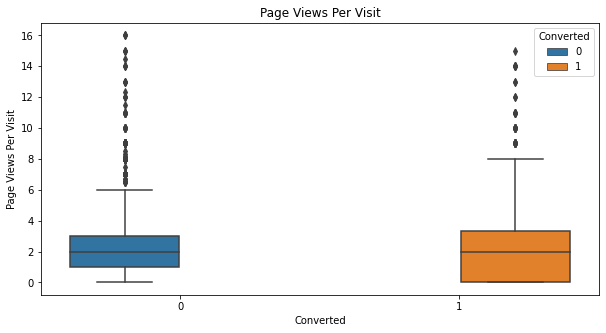

In [49]:
## For Numerical Data 

column_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in column_list:
    plt.figure(figsize=(10,5))
    print(DF_NEW2[i].describe())
    sns.boxplot(y=i,x='Converted', hue='Converted',data=DF_NEW3)
    plt.title(i)
    plt.show()

### Heatmap of Correlation

In [50]:
DF_CORR = DF_NEW3[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

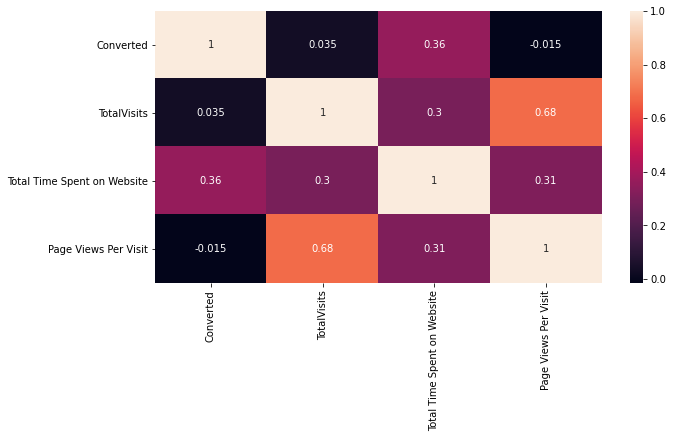

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(DF_CORR.corr(),annot=True)
plt.show()

### Observation 
Observations: From the above EDA, 
 1. Most converted leads are originated from Lead add and landing page submission 
 2. Most Conversion has happened from Google , Direct traffic and reference 
 3. Leads dont want calls or mails
 4. Most converted are unemployed and looking for better career prospects
 5. Most leads didn't see any adds in search , magazine , Education forum, news paper or digital forum
 

In [52]:
DF_NEW3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9231 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9238 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [53]:
print(DF_NEW3['TotalVisits'].mode())
DF_NEW3['TotalVisits'] = DF_NEW3['TotalVisits'].fillna('0')

print(DF_NEW3['Page Views Per Visit'].mode())
DF_NEW3['Page Views Per Visit'] = DF_NEW3['Page Views Per Visit'].fillna('0')

0    0.0
dtype: float64
0    0.0
dtype: float64


In [54]:
DF_NEW3.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## Dummy Value Creation For Regression


In [55]:
DF_encoded = pd.get_dummies(DF_NEW3, columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity'])


In [56]:
DF_encoded.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5,674,2.5,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2,1532,2,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,0,1,305,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,2,1428,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
DF_encoded.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 139 columns):
 #   Column                                                                   Dtype 
---  ------                                                                   ----- 
 0   Converted                                                                int64 
 1   TotalVisits                                                              object
 2   Total Time Spent on Website                                              int64 
 3   Page Views Per Visit                                                     object
 4   Lead Origin_API                                                          uint8 
 5   Lead Origin_Landing Page Submission                                      uint8 
 6   Lead Origin_Lead Add Form                                                uint8 
 7   Lead Origin_Lead Import                                                  uint8 
 8   Lead Origin_Quick Add Form           

In [58]:
## Dropping few attributes to make the model better after multiple iterations

DF_encoded= DF_encoded.drop(['What matters most to you in choosing a course_NA'], axis=1)
DF_encoded= DF_encoded.drop(['Last Notable Activity_Unreachable'], axis=1)
DF_encoded= DF_encoded.drop(['Last Activity_NA'], axis=1)
DF_encoded= DF_encoded.drop(['Lead Profile_NA'], axis=1)
DF_encoded= DF_encoded.drop(['City_NA'], axis=1)
DF_encoded= DF_encoded.drop(['What is your current occupation_NA'], axis=1) 
DF_encoded= DF_encoded.drop(['Tags_NA'], axis=1) 
DF_encoded= DF_encoded.drop(['How did you hear about X Education_NA'], axis=1)

### OBSERVATION

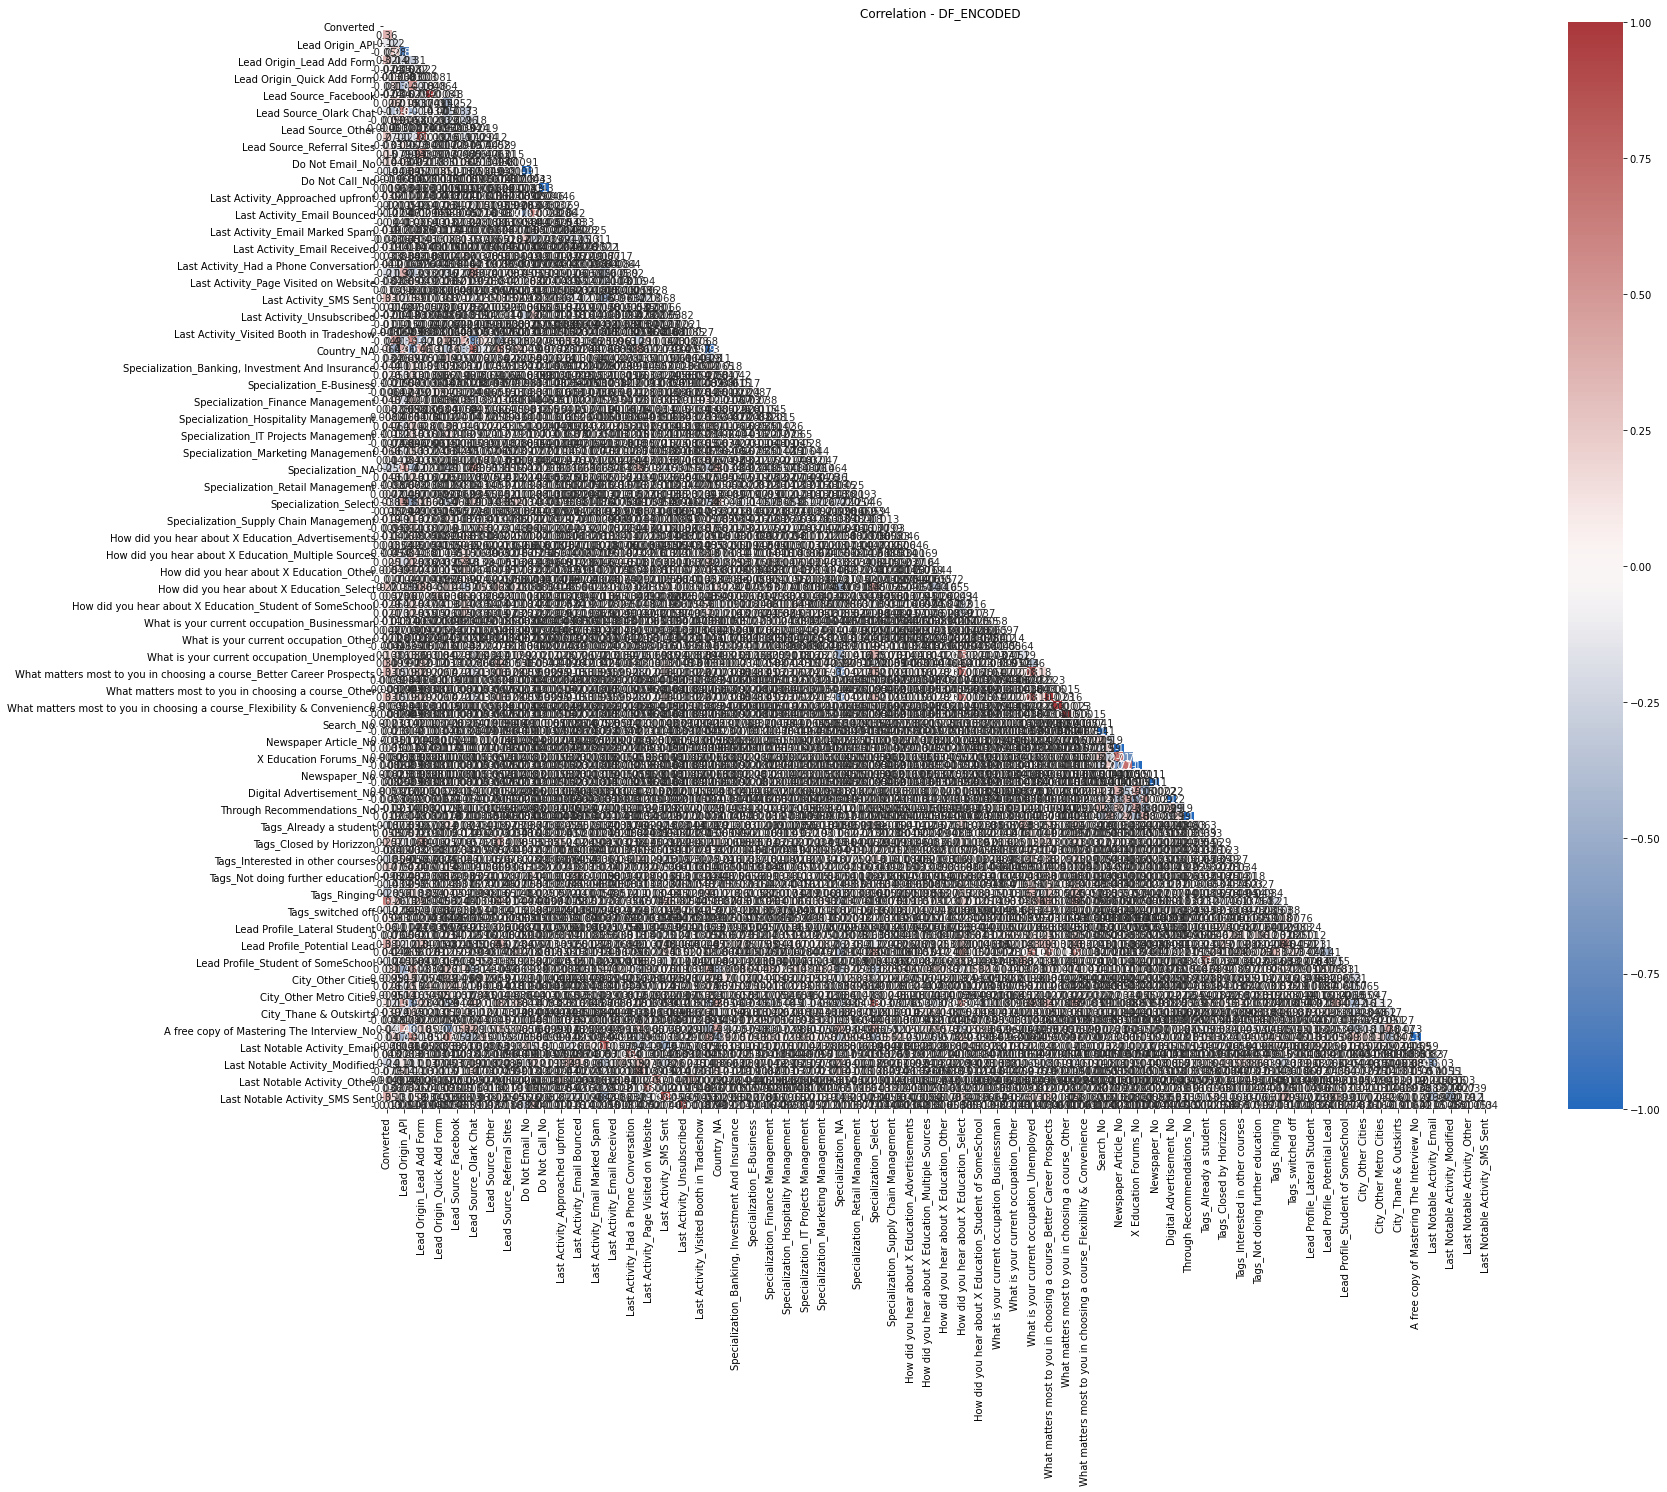

In [59]:
plt.figure(figsize=(25,20))

sns.heatmap(DF_encoded.corr(), annot=True, cmap = 'vlag', mask= np.triu(DF_encoded.corr()))
plt.title("Correlation - DF_ENCODED")
plt.show()

## Building Test and Train set 

In [60]:
# Using MinMaxScaler to Rescaling the features
# Rescalling as the name suggests brings the attributes under one scale for example 0-1 in case of min max
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to all the columns except the '1-0' and 'encoded' variables

var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
DF_encoded[var] = scaler.fit_transform(DF_encoded[var])

In [62]:
#Define the independent and dependent variables
y= DF_encoded['Converted'] #dependent variable is Decision
X= DF_encoded.drop(['Converted'], axis=1)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [63]:
print('X train shape ',X_train.shape)
print('X test shape ',X_test.shape)

print('y train shape ',y_train.shape)
print('y test shape ',y_test.shape)

X train shape  (6468, 129)
X test shape  (2772, 129)
y train shape  (6468,)
y test shape  (2772,)


In [64]:
DF_encoded.isnull().mean()*100

Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Lead Origin_API                                  0.0
                                                ... 
Last Notable Activity_Olark Chat Conversation    0.0
Last Notable Activity_Other                      0.0
Last Notable Activity_Page Visited on Website    0.0
Last Notable Activity_SMS Sent                   0.0
Last Notable Activity_Unsubscribed               0.0
Length: 130, dtype: float64

## Building Model

Using Logistic regresion and Feature elimination 

In [65]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [66]:
##Feature elimination is an imp step , as per insdustry standard , we follow hybrid(automated(RFE) + manual(p value and VIF))
# create pipeline, selecting 15 variables

rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [67]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_API', False, 86),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', False, 19),
 ('Lead Origin_Lead Import', False, 109),
 ('Lead Origin_Quick Add Form', False, 66),
 ('Lead Source_Direct Traffic', False, 55),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 56),
 ('Lead Source_Olark Chat', False, 57),
 ('Lead Source_Organic Search', False, 90),
 ('Lead Source_Other', False, 31),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_No', False, 30),
 ('Do Not Email_Yes', False, 4),
 ('Do Not Call_No', False, 96),
 ('Do Not Call_Yes', False, 102),
 ('Last Activity_Approached upfront', False, 65),
 ('Last Activity_Converted to Lead', False, 17),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked'

In [68]:
## Printing col from RFE selection

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')


In [69]:
### checking which columns has been rejected

print(X_train.columns[~rfe.support_])

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'City_Tier II Cities', 'A free copy of Mastering The Interview_No',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object', length=114)


In [70]:
X_train_rfe = X_train[rfe_col]

In [71]:
X_train_rfe.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
4926,0.734155,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
1750,0.461708,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1
5470,0.572183,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
3115,0.176937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6188,0.000000,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [72]:
# Importing statsmodels
import statsmodels.api as sm

In [73]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Nov 2022   Deviance:                          nan
Time:                        15:52:17   Pearson chi2:                 8.11e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                                               1.6647      0.177      9.416      0.000       1.318       2.011
Lead Source_Welingak Website                                           3.816e+15   7.07e+06    5.4e+08      0.000    3.82e+15    3.82e+15
Last Activity_SMS Sent                                                    0.6050      0.097      6.257      0.000       0.415       0.794
What matters most to you in choosing a course_Better Career Prospects -8.035e+06      0.055  -1.47e+08      0.000   -8.04e+06   -8.04e+06
What matters most to you in choosing a course_Better Career Prospects  8.035e+06      0.055   1.47e+08      0.000    8.04e+06    8.04e+06
Tags_Already a student                                                   -4.9768      0.498     -9.994      0.000      -5.953      -4.001
Tags_Closed by Horizzon                                                4.171e+15   4.13e+06   1.01e+09      0.000    4.17e+15    4.17e+15
Tags_Interested  in full time MBA                                     -1.995e+15   7.55e+06  -2.64e+08      0.000      -2e+15      -2e+15
Tags_Interested in other courses                                         -2.5236      0.285     -8.840      0.000      -3.083      -1.964
Tags_Lost to EINS                                                         6.3856      0.356     17.929      0.000       5.688       7.084
Tags_Not doing further education                                      -4.504e+15   6.89e+06  -6.54e+08      0.000    -4.5e+15    -4.5e+15
Tags_Other                                                            -4.132e+15   3.93e+06  -1.05e+09      0.000   -4.13e+15   -4.13e+15
Tags_Ringing                                                             -4.6140      0.217    -21.238      0.000      -5.040      -4.188
Tags_Will revert after reading the email                                  3.7802      0.181     20.906      0.000       3.426       4.135
Tags_switched off                                                        -4.9577      0.477    -10.391      0.000      -5.893      -4.023
Last Notable Activity_Modified                                           -2.7802      0.091    -30.607      0.000      -2.958      -2.602
=========================================================================================================================================
"""

In [74]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What matters most to you in choosing a course_...,inf
4,What matters most to you in choosing a course_...,inf
13,Tags_Will revert after reading the email,3.27
12,Tags_Ringing,2.32
0,Total Time Spent on Website,1.83
5,Tags_Already a student,1.60
8,Tags_Interested in other courses,1.60
2,Last Activity_SMS Sent,1.55
11,Tags_Other,1.48
6,Tags_Closed by Horizzon,1.45


Vif well below 5 hence building coreaktion matrix 

In [76]:
## Co linearity found with field :dropping field SHello moved above for iteration 

X_train_rfe= X_train_rfe.drop(['Tags_Will revert after reading the email'], axis=1)
X_train_rfe= X_train_rfe.drop(['What matters most to you in choosing a course_Better Career Prospects'], axis=1)

In [77]:
## Fitting the model

X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2113.5
Date:                Mon, 14 Nov 2022   Deviance:                       4227.1
Time:                        15:52:18   Pearson chi2:                 6.54e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Total Time Spent on Website           2.5783      0.144     17.891      0.000       2.296       2.861
Lead Source_Welingak Website         24.9740   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Last Activity_SMS Sent                1.4179      0.082     17.326      0.000       1.257       1.578
Tags_Already a student               -5.1116      0.714     -7.164      0.000      -6.510      -3.713
Tags_Closed by Horizzon               6.5582      1.006      6.516      0.000       4.586       8.531
Tags_Interested  in full time MBA    -3.4270      0.731     -4.687      0.000      -4.860      -1.994
Tags_Interested in other courses     -3.2765      0.342     -9.578      0.000      -3.947      -2.606
Tags_Lost to EINS                     4.3061      0.522      8.256      0.000       3.284       5.328
Tags_Not doing further education    -25.1052   2.02e+04     -0.001      0.999   -3.96e+04    3.95e+04
Tags_Other                           -3.5109      0.287    -12.217      0.000      -4.074      -2.948
Tags_Ringing                         -4.7169      0.221    -21.370      0.000      -5.149      -4.284
Tags_switched off                    -4.9219      0.519     -9.488      0.000      -5.939      -3.905
Last Notable Activity_Modified       -2.0839      0.081    -25.825      0.000      -2.242      -1.926
=====================================================================================================
"""

In [78]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.44
12,Last Notable Activity_Modified,1.43
2,Last Activity_SMS Sent,1.31
6,Tags_Interested in other courses,1.12
4,Tags_Closed by Horizzon,1.10
10,Tags_Ringing,1.09
3,Tags_Already a student,1.05
7,Tags_Lost to EINS,1.05
9,Tags_Other,1.05
1,Lead Source_Welingak Website,1.03


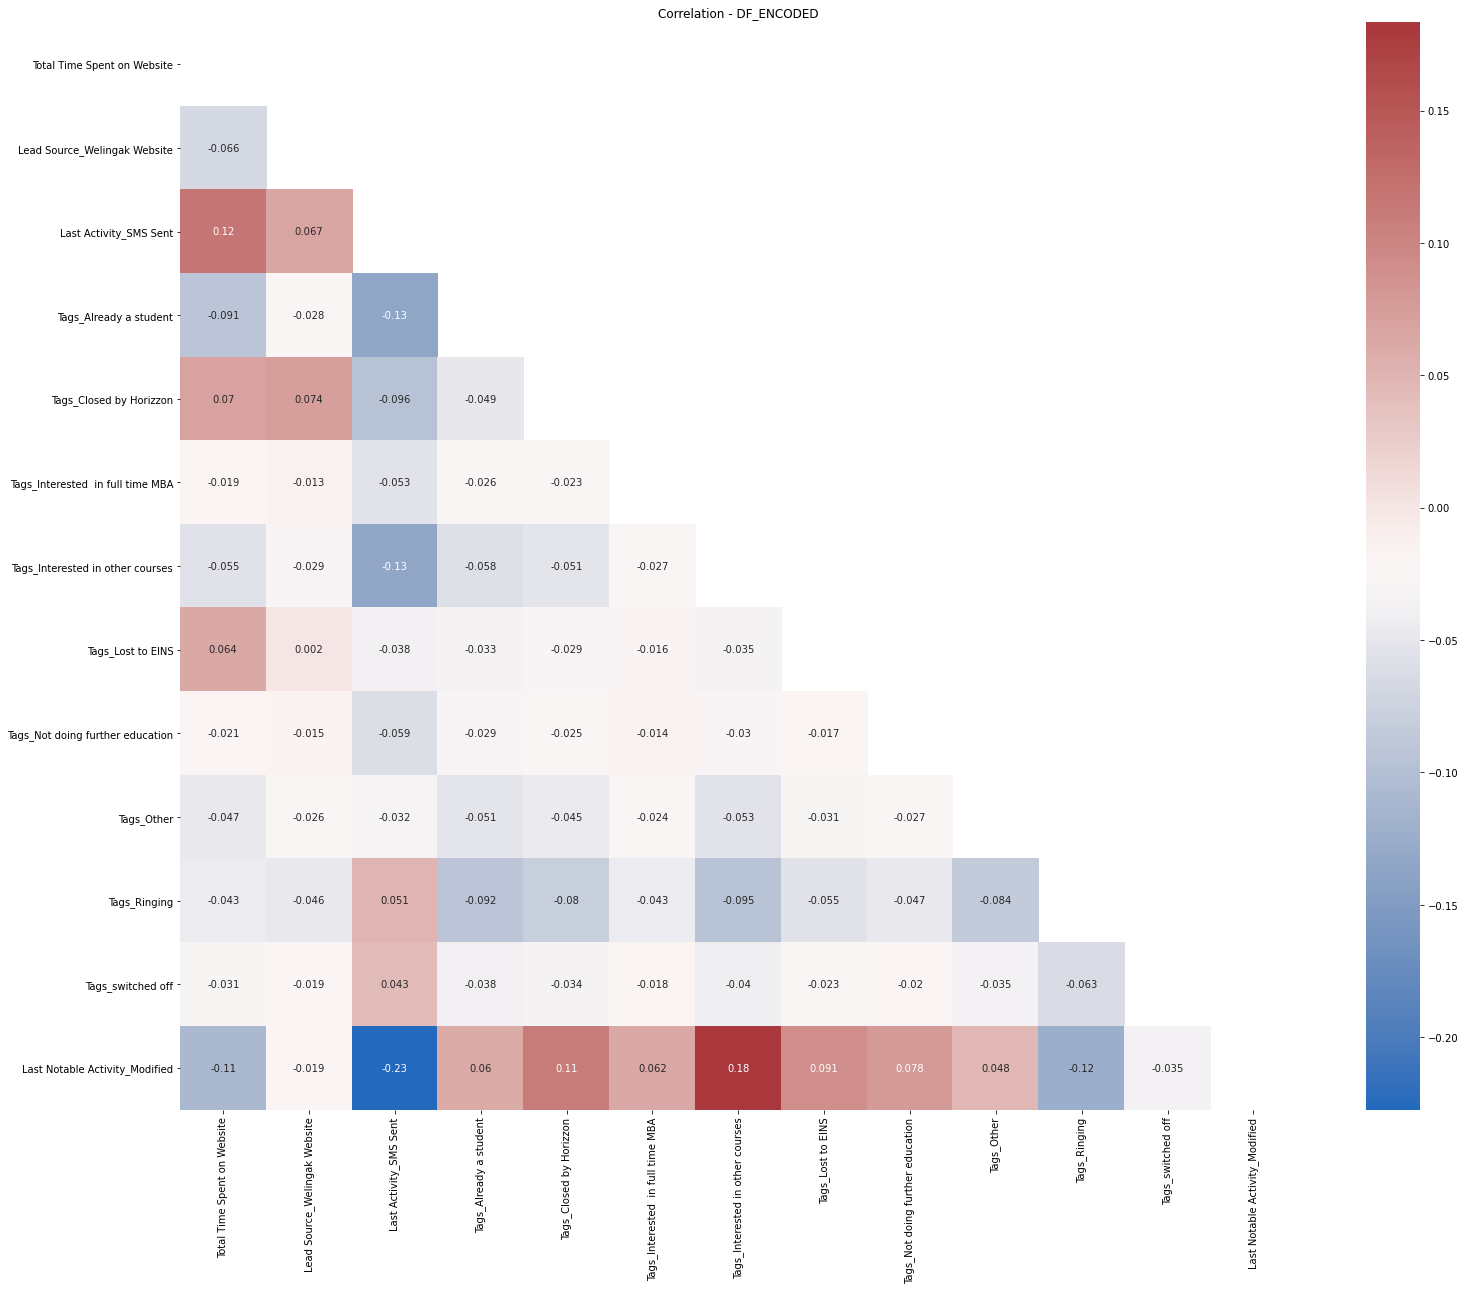

In [79]:
plt.figure(figsize=(25,20))

sns.heatmap(X_train_rfe.corr(), annot=True, cmap = 'vlag', mask= np.triu(X_train_rfe.corr()))
plt.title("Correlation - DF_ENCODED")
plt.show()

In [82]:
y_train_pred

## Creating Prediction

In [83]:
res.predict(X_train_rfe)

4926    0.964796
1750    0.014884
5470    0.947507
3115    0.612113
6188    0.005990
          ...   
4306    0.110667
8585    0.110667
3663    0.110667
8646    0.759642
7264    0.110667
Length: 6468, dtype: float64

In [84]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_rfe)
y_train_pred[:10]

4926    0.964796
1750    0.014884
5470    0.947507
3115    0.612113
6188    0.005990
979     0.047637
6638    0.500000
3780    0.010875
7114    0.005194
8557    0.110667
dtype: float64

In [85]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96479646, 0.01488365, 0.94750691, 0.61211283, 0.00599006,
       0.0476375 , 0.5       , 0.01087531, 0.00519447, 0.11066735])

In [86]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.964796
1,0,0.014884
2,1,0.947507
3,0,0.612113
4,0,0.005990


In [87]:
# Substituting 0 or 1 with the cut off as 0.6
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.964796,1
1,0,0.014884,0
2,1,0.947507,1
3,0,0.612113,1
4,0,0.005990,0


## Model Evaluation

In [88]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3649,  325],
       [ 526, 1968]], dtype=int64)

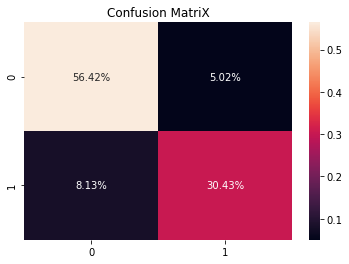

In [89]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%')
plt.title("Confusion MatriX")
plt.show()

In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8684291898577613

In [91]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [92]:
# Calculating the sensitivity
TP/(TP+FN)

0.789093825180433

In [93]:
# Calculating the specificity
TN/(TN+FP)

0.9182184197282335

In [94]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

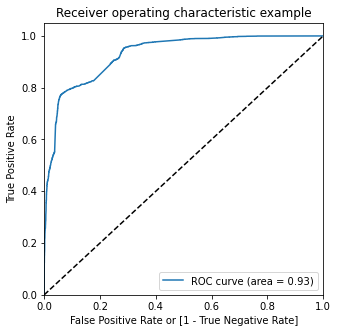

In [96]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Prediction on Test set

In [97]:
# Substituting all the columns in the final train model
col = X_train_rfe.columns

In [98]:
# Select the columns in X_train for X_test as well
X_test_ref = X_test[col]


In [99]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_ref)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.001249
1,0,0.529471
2,1,0.662672
3,0,0.658856
4,0,0.223514


In [100]:
# Making prediction using cut off 0.60
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.60 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.001249,0
1,0,0.529471,0
2,1,0.662672,1
3,0,0.658856,1
4,0,0.223514,0
...,...,...,...
2767,1,0.824187,1
2768,0,0.038033,0
2769,1,0.462523,0
2770,0,0.033133,0


In [101]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8538961038961039

In [102]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1541,  164],
       [ 241,  826]], dtype=int64)

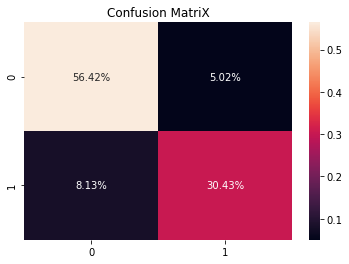

In [103]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%')
plt.title("Confusion MatriX")
plt.show()

In [104]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [105]:
# Calculating the sensitivity
TP/(TP+FN)

0.7741330834114339

In [106]:
# Calculating the specificity
TN/(TN+FP)

0.9038123167155425

## Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. Total number of visits.
3. What the lead source was

Train set:
Accuracy: 0.8684291898577613
Sensitivity: 0.789093825180433
Specificity: 0.9182184197282335

Test set:
Accuracy: 0.8538961038961039
Sensitivity:0.7741330834114339
Specificity:0.9038123167155425